In [ ]:
import numpy as np
import pandas as pd
import torch
import random
from tqdm import tqdm
from sklearn.metrics import f1_score
from os import path
from os import listdir
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from math import log2, e



In [ ]:
import torchvision.datasets

In [ ]:
train_mnist = torchvision.datasets.MNIST('./', download=True, train=True)
test_mnist = torchvision.datasets.MNIST('./', download=True, train=False)
X_train = train_mnist.train_data
Y_train = train_mnist.train_labels
X_test = test_mnist.train_data
Y_test = test_mnist.train_labels

/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:58: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")
/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:48: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")


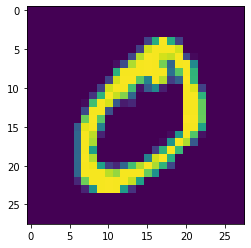

tensor(0)

In [ ]:
plt.imshow(X_train[1, :, :])
plt.show()
Y_train[1]

In [ ]:
X_train = X_train.unsqueeze(1).float()
X_test = X_test.unsqueeze(1).float()

In [ ]:
class View(torch.nn.Module):
    def forward(self, X):
        return X.view(X.size(0), X.size(1) * X.size(2) * X.size(3))
    
model1 = torch.nn.Sequential(
    torch.nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5, padding=2),
    torch.nn.ReLU(),
    torch.nn.AvgPool2d(kernel_size=2, stride=2),

    torch.nn.Conv2d(in_channels=6, out_channels=16, kernel_size=5, padding=0),
    torch.nn.ReLU(),
    torch.nn.AvgPool2d(kernel_size=2, stride=2),

    View(),

    torch.nn.Linear(400, 120),
    torch.nn.ReLU(),
    torch.nn.Linear(120, 84),
    torch.nn.ReLU(),
    torch.nn.Linear(84, 10)
)

model2 = torch.nn.Sequential(
    View(),

    torch.nn.Linear(28 * 28, 10)
)

model4 = torch.nn.Sequential(
    torch.nn.AdaptiveAvgPool2d(10),
    torch.nn.Tanh(),
    torch.nn.AvgPool2d(kernel_size=2, stride=2),

    View(),

    torch.nn.Linear(5 * 5, 10)
)

model3 = torch.nn.Sequential(
    torch.nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5, padding=0),
    torch.nn.Tanh(),
    torch.nn.AvgPool2d(kernel_size=2, stride=2),

    torch.nn.Conv2d(in_channels=6, out_channels=16, kernel_size=5, padding=2),
    torch.nn.Tanh(),
    torch.nn.AvgPool2d(kernel_size=2, stride=2),

    View(),

    torch.nn.Linear(16 * 36, 120),
    torch.nn.Tanh(),
    torch.nn.Linear(120, 84),
    torch.nn.Tanh(),
    torch.nn.Linear(84, 10)
)

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
model1 = model1.to(device)
model2 = model2.to(device)
model3 = model3.to(device)
model4 = model4.to(device)

In [ ]:
batch = 100
X_train = X_train.to(device)
X_test = X_test.to(device)

In [ ]:
class trainModel:
  def __init__(self):
    self.accuracy_array = []
    self.loss_array = []
  def model_work(self, model):
    loss = torch.nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters(), lr = 0.001)
    for epoch in tqdm(range(20)):
      for i in range(600):
          indexes = np.random.randint(0, 60000, batch)
          optimizer.zero_grad()
          y_pred = model(X_train[indexes])
          y_pred = y_pred.cpu()
          loss_value = loss(y_pred, Y_train[indexes])
          loss_value.backward()
          optimizer.step()
      y_pred = model(X_test)
      y_pred = y_pred.cpu()
      self.loss_array.append(loss(y_pred, Y_test))
      y_pred = y_pred.detach().numpy()
      y_pred_real = [0] * len(y_pred)
      for i in range(len(y_pred)):
          y_pred_real[i] = y_pred[i].argmax()
      self.accuracy_array.append(accuracy_score(Y_test.numpy(), y_pred_real))
      print(accuracy_score(Y_test.numpy(), y_pred_real))
    del loss
    del optimizer

  5%|▌         | 1/20 [00:02<00:52,  2.75s/it]

0.9818


 10%|█         | 2/20 [00:05<00:49,  2.73s/it]

0.9828


 15%|█▌        | 3/20 [00:08<00:46,  2.71s/it]

0.9882


 20%|██        | 4/20 [00:10<00:42,  2.68s/it]

0.9877


 25%|██▌       | 5/20 [00:13<00:40,  2.68s/it]

0.9892


 30%|███       | 6/20 [00:16<00:37,  2.68s/it]

0.9871


 35%|███▌      | 7/20 [00:18<00:34,  2.69s/it]

0.9899


 40%|████      | 8/20 [00:21<00:32,  2.75s/it]

0.9909


 45%|████▌     | 9/20 [00:24<00:30,  2.75s/it]

0.9852


 50%|█████     | 10/20 [00:27<00:27,  2.76s/it]

0.989


 55%|█████▌    | 11/20 [00:29<00:24,  2.74s/it]

0.9892


 60%|██████    | 12/20 [00:32<00:22,  2.75s/it]

0.9906


 65%|██████▌   | 13/20 [00:35<00:19,  2.78s/it]

0.9903


 70%|███████   | 14/20 [00:38<00:16,  2.75s/it]

0.9861


 75%|███████▌  | 15/20 [00:41<00:13,  2.79s/it]

0.9894


 80%|████████  | 16/20 [00:44<00:11,  2.84s/it]

0.9849


 85%|████████▌ | 17/20 [00:46<00:08,  2.81s/it]

0.9899


 90%|█████████ | 18/20 [00:49<00:05,  2.84s/it]

0.9893


 95%|█████████▌| 19/20 [00:52<00:02,  2.79s/it]

0.9905


100%|██████████| 20/20 [00:55<00:00,  2.77s/it]
No handles with labels found to put in legend.


0.9901


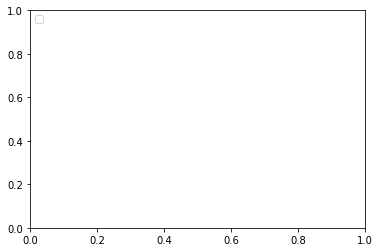

In [ ]:
m1 = trainModel()
m1.model_work(model1)
#m2 = trainModel()
#m2.model_work(model2)
#del model2
#m3 = trainModel()
#m3.model_work(model3)
#del model3
#m4 = trainModel()
#m4.model_work(model4)
#plt.plot([x / 100 for x in tange(100)], m3.accuracy_array, linestyle='solid', color='yellow', label="nonstandart")
plt.legend(loc=2, ncol=2)
plt.show()

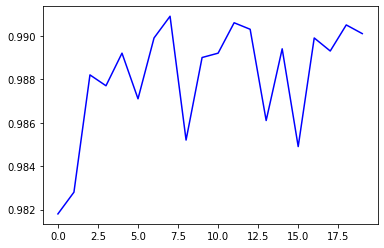

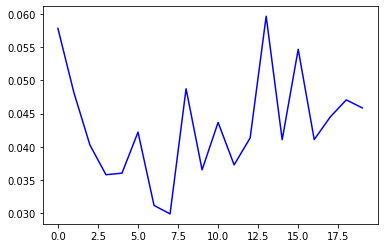

In [ ]:

plt.plot([x for x in range(20)], m1.accuracy_array, linestyle='solid', color='blue', label="normal")
plt.show()
plt.plot([x for x in range(20)], m1.loss_array, linestyle='solid', color='blue', label="normal")
plt.show()
#plt.plot([x for x in range(20)], m2.accuracy_array, linestyle='solid', color='yellow', label="primitve")
#plt.plot([x for x in range(20)], m3.accuracy_array, linestyle='solid', color='yellow', label="primitve")
#plt.plot([x for x in range(20)], m4.accuracy_array, linestyle='solid', color='yellow', label="primitve")

/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:58: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")
/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:48: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")


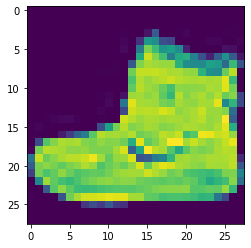

In [ ]:
train_mnist = torchvision.datasets.FashionMNIST('./', download=True, train=True)
test_mnist = torchvision.datasets.FashionMNIST('./', download=True, train=False)
X_train = train_mnist.train_data
Y_train = train_mnist.train_labels
X_test = test_mnist.train_data
Y_test = test_mnist.train_labels

batch = 100
X_train = X_train.to(device)
X_test = X_test.to(device)

plt.imshow(X_train[0, :, :].cpu())
plt.show()
Y_train[1]

X_train = X_train.unsqueeze(1).float()
X_test = X_test.unsqueeze(1).float()

  5%|▌         | 1/20 [00:02<00:46,  2.47s/it]

0.8498


 10%|█         | 2/20 [00:05<00:45,  2.50s/it]

0.8665


 15%|█▌        | 3/20 [00:07<00:43,  2.54s/it]

0.8697


 20%|██        | 4/20 [00:10<00:40,  2.52s/it]

0.8797


 25%|██▌       | 5/20 [00:12<00:38,  2.55s/it]

0.8835


 30%|███       | 6/20 [00:15<00:35,  2.57s/it]

0.887


 35%|███▌      | 7/20 [00:17<00:33,  2.58s/it]

0.8897


 40%|████      | 8/20 [00:20<00:30,  2.58s/it]

0.8909


 45%|████▌     | 9/20 [00:23<00:28,  2.58s/it]

0.889


 50%|█████     | 10/20 [00:25<00:25,  2.58s/it]

0.8918


 55%|█████▌    | 11/20 [00:28<00:23,  2.59s/it]

0.8952


 60%|██████    | 12/20 [00:31<00:21,  2.66s/it]

0.8889


 65%|██████▌   | 13/20 [00:33<00:18,  2.67s/it]

0.8968


 70%|███████   | 14/20 [00:36<00:15,  2.66s/it]

0.8923


 75%|███████▌  | 15/20 [00:39<00:13,  2.62s/it]

0.8923


 80%|████████  | 16/20 [00:41<00:10,  2.59s/it]

0.8979


 85%|████████▌ | 17/20 [00:44<00:07,  2.59s/it]

0.8914


 90%|█████████ | 18/20 [00:46<00:05,  2.59s/it]

0.8956


 95%|█████████▌| 19/20 [00:49<00:02,  2.59s/it]

0.8905


100%|██████████| 20/20 [00:52<00:00,  2.60s/it]

0.8945
[849, 0, 17, 27, 1, 0, 134, 0, 0, 0]
[4, 979, 1, 9, 2, 0, 3, 0, 1, 0]
[31, 1, 835, 13, 82, 0, 72, 0, 6, 0]
[15, 14, 13, 897, 38, 0, 22, 0, 3, 0]
[2, 1, 58, 23, 817, 0, 61, 0, 3, 0]
[2, 0, 1, 1, 0, 977, 1, 6, 2, 7]
[90, 4, 72, 26, 59, 0, 691, 0, 6, 0]
[1, 0, 0, 0, 1, 17, 1, 979, 5, 43]
[6, 1, 3, 4, 0, 0, 15, 0, 972, 1]
[0, 0, 0, 0, 0, 6, 0, 15, 2, 949]


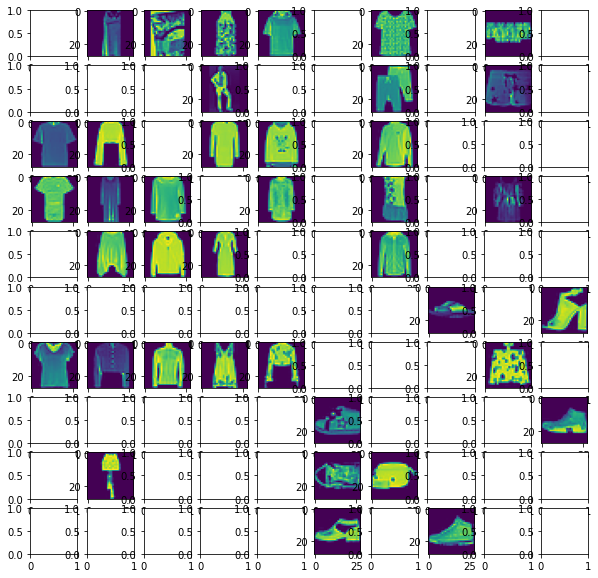

In [ ]:
loss = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model1.parameters(), lr = 0.001)
f,ax = plt.subplots(10, 10, figsize=(10, 10))

accuracy_array = []
loss_array = []
conf_matr = [0] * 10
matrix = [0] * 10
for i in range(10):
  matrix[i] = [(0, -1) for i in range(1)] * 10   
  conf_matr[i] = [0] * 10
  
for epoch in tqdm(range(20)):
    for i in range(600):
        indexes = np.random.randint(0, 60000, batch)
        optimizer.zero_grad()
        y_pred = model1(X_train[indexes])
        y_pred = y_pred.cpu()
        loss_value = loss(y_pred, Y_train[indexes])
        loss_value.backward()
        optimizer.step()
    y_pred = model1(X_test)
    y_pred = y_pred.cpu()
    loss_array.append(loss(y_pred, Y_test))
    y_pred = y_pred.detach().numpy()
    y_pred_real = [0] * len(y_pred)
    for i in range(len(y_pred)):
        y_pred_real[i] = y_pred[i].argmax()
        if (epoch == 19):
          conf_matr[y_pred_real[i]][Y_test[i]] += 1
          if (y_pred_real[i] != Y_test[i]):
            if (matrix[y_pred_real[i]][Y_test[i]][0] < y_pred[i][y_pred_real[i]]):
              matrix[y_pred_real[i]][Y_test[i]] = (y_pred[i][y_pred_real[i]], i)
            #ax[y_pred_real[i], Y_test[i]].imshow(X_test[i, 0, :, :].cpu())
    accuracy_array.append(accuracy_score(Y_test.detach().numpy(), y_pred_real))
    print(accuracy_score(Y_test.detach().numpy(), y_pred_real))
for i in range(10):
  for j in range(10):
    if (matrix[i][j][1] != -1):
      ax[j, i].imshow(X_test[matrix[i][j][1], 0, :, :].cpu())
print(*conf_matr, sep='\n')

/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:58: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")
/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:48: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")


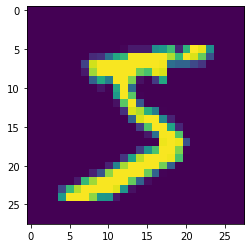

  5%|▌         | 1/20 [00:02<00:47,  2.47s/it]

0.9611


 10%|█         | 2/20 [00:05<00:45,  2.52s/it]

0.9748


 15%|█▌        | 3/20 [00:07<00:44,  2.61s/it]

0.9758


 20%|██        | 4/20 [00:10<00:41,  2.58s/it]

0.9789


 25%|██▌       | 5/20 [00:13<00:39,  2.64s/it]

0.9819


 30%|███       | 6/20 [00:16<00:37,  2.69s/it]

0.9824


 35%|███▌      | 7/20 [00:18<00:36,  2.77s/it]

0.984


 40%|████      | 8/20 [00:21<00:33,  2.76s/it]

0.9842


 45%|████▌     | 9/20 [00:24<00:29,  2.72s/it]

0.985


 50%|█████     | 10/20 [00:26<00:26,  2.69s/it]

0.9849


 55%|█████▌    | 11/20 [00:29<00:24,  2.71s/it]

0.9852


 60%|██████    | 12/20 [00:32<00:21,  2.71s/it]

0.9863


 65%|██████▌   | 13/20 [00:35<00:18,  2.69s/it]

0.9864


 70%|███████   | 14/20 [00:37<00:16,  2.71s/it]

0.9851


 75%|███████▌  | 15/20 [00:40<00:13,  2.69s/it]

0.9865


 80%|████████  | 16/20 [00:43<00:10,  2.73s/it]

0.9859


 85%|████████▌ | 17/20 [00:46<00:08,  2.73s/it]

0.9879


 90%|█████████ | 18/20 [00:48<00:05,  2.74s/it]

0.9873


 95%|█████████▌| 19/20 [00:51<00:02,  2.78s/it]

0.987


100%|██████████| 20/20 [00:54<00:00,  2.73s/it]

0.9874
[978, 0, 3, 1, 0, 2, 3, 1, 2, 0] [0, 1131, 0, 0, 0, 0, 4, 2, 1, 2] [0, 2, 1019, 2, 1, 0, 1, 4, 3, 0] [0, 1, 2, 993, 0, 6, 0, 1, 0, 2] [0, 0, 0, 0, 969, 0, 0, 1, 3, 8] [0, 0, 0, 8, 0, 881, 6, 0, 4, 2] [0, 0, 1, 0, 3, 2, 942, 0, 1, 0] [1, 0, 4, 2, 0, 0, 0, 1014, 3, 1] [1, 1, 3, 3, 0, 1, 1, 1, 954, 1] [0, 0, 0, 1, 9, 0, 1, 4, 3, 993]


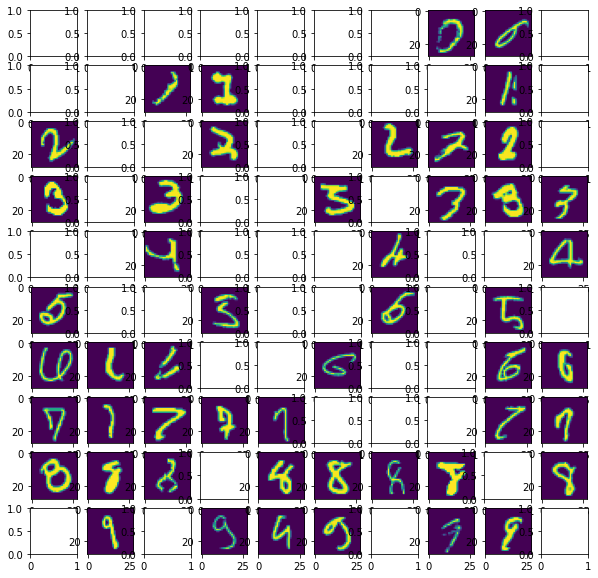

In [ ]:
train_mnist = torchvision.datasets.MNIST('./', download=True, train=True)
test_mnist = torchvision.datasets.MNIST('./', download=True, train=False)
X_train = train_mnist.train_data
Y_train = train_mnist.train_labels
X_test = test_mnist.train_data
Y_test = test_mnist.train_labels

batch = 100
X_train = X_train.to(device)
X_test = X_test.to(device)

plt.imshow(X_train[0, :, :].cpu())
plt.show()
Y_train[1]

X_train = X_train.unsqueeze(1).float()
X_test = X_test.unsqueeze(1).float()

loss = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model1.parameters(), lr = 0.001)
f,ax = plt.subplots(10, 10, figsize=(10, 10))

accuracy_array = []
loss_array = []
conf_matr = [0] * 10
matrix = [0] * 10
for i in range(10):
  matrix[i] = [(0, -1) for i in range(1)] * 10   
  conf_matr[i] = [0] * 10   
  
for epoch in tqdm(range(20)):
    for i in range(600):
        indexes = np.random.randint(0, 60000, batch)
        optimizer.zero_grad()
        y_pred = model1(X_train[indexes])
        y_pred = y_pred.cpu()
        loss_value = loss(y_pred, Y_train[indexes])
        loss_value.backward()
        optimizer.step()
    y_pred = model1(X_test)
    y_pred = y_pred.cpu()
    loss_array.append(loss(y_pred, Y_test))
    y_pred = y_pred.detach().numpy()
    y_pred_real = [0] * len(y_pred)
    for i in range(len(y_pred)):
        y_pred_real[i] = y_pred[i].argmax()
        if (epoch == 19):
          conf_matr[y_pred_real[i]][Y_test[i]] += 1
          if (y_pred_real[i] != Y_test[i]):
            if (matrix[y_pred_real[i]][Y_test[i]][0] < y_pred[i][y_pred_real[i]]):
              matrix[y_pred_real[i]][Y_test[i]] = (y_pred[i][y_pred_real[i]], i)
            #ax[y_pred_real[i], Y_test[i]].imshow(X_test[i, 0, :, :].cpu())
    accuracy_array.append(accuracy_score(Y_test.detach().numpy(), y_pred_real))
    print(accuracy_score(Y_test.detach().numpy(), y_pred_real))
for i in range(10):
  for j in range(10):
    if (matrix[i][j][1] != -1):
      ax[j, i].imshow(X_test[matrix[i][j][1], 0, :, :].cpu())
print(*conf_matr, sep='\n')

In [ ]:
print(*conf_matr, sep='\n')

NameError: ignored

In [ ]:
sum(loss(i, class[i])/ sum(weight[class[i]]))